In [56]:
from basepolygon_class import GoalPolygon
from shapely.geometry import Polygon, LineString
from sklearn.neighbors import KernelDensity

place_one = GoalPolygon('Жилой комплекс "Жулебино Парк" стройка')
v = place_one.polygon

/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Геометрическое упрощение

In [57]:
'''def get_xy(s):

    x, y = s.centroid.coords.xy
    return x[0], y[0]'''

'def get_xy(s):\n\n    x, y = s.centroid.coords.xy\n    return x[0], y[0]'

Здесь полигон в нуле не от центра

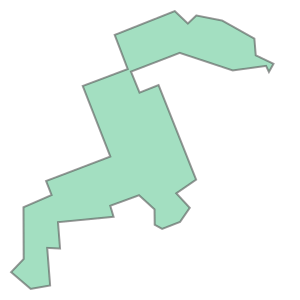

In [58]:
from shapely.affinity import translate
import numpy as np

s = v.simplify(10, preserve_topology=True)
x, y, _, _ = v.bounds
#x, y = get_xy(s)
st = translate(s, 0-x, 0-y)
st

In [59]:
coor_list = (list(st.boundary.coords[0:len(st.boundary.coords) - 1]))
coor_list

[(0.0, 42.42240105941892),
 (49.646892975317314, 0.0),
 (98.84738645789912, 8.644872757606208),
 (91.4870680613094, 103.90478569734842),
 (123.99432792240987, 102.31525947432965),
 (118.84098943317076, 169.09848177898675),
 (259.5926219234825, 182.74853624869138),
 (251.26317001710413, 210.77966740820557),
 (324.2408816458192, 237.37195728812367),
 (363.47268786811037, 201.54586718510836),
 (363.9113453243044, 162.49007819592953),
 (382.8016503081308, 152.13047074340284),
 (428.13861587963765, 169.7247769329697),
 (452.75512537162285, 205.44482689723372),
 (418.62160929798847, 242.2890095654875),
 (468.869841001404, 276.86797133646905),
 (373.6430417126394, 516.6187753705308),
 (325.4972854232765, 497.4457708345726),
 (303.76772698637797, 550.6964679146186),
 (427.32105774397496, 598.1822010865435),
 (561.7782090922119, 553.6829920513555),
 (646.1450598833035, 565.1904505407438),
 (653.429957066779, 549.7999624321237),
 (664.9604775389307, 570.4281977945939),
 (620.0133774741553, 591.9

разбиение точек на группы по сегментам

In [74]:
from itertools import islice, cycle

def vec_search(point_list, key):
    cr = []
    n = list(islice(cycle(range(len(point_list))), 0, len(point_list) *2))
    for i in range(len(point_list)):
        v_one = [point_list[n[i]][0] - point_list[n[i + 1]][0], point_list[n[i]][1] - point_list[n[i + 1]][1], 0]
        v_two = [point_list[n[i + 1]][0] - point_list[n[i + 2]][0], point_list[n[i + 1]][1] - point_list[n[i + 2]][1],0]
        v_o_norm, v_t_norm = v_one / np.linalg.norm(v_one), v_two / np.linalg.norm(v_two)
        if np.cross(v_o_norm, v_t_norm)[2] < key:
            cr.append(n[i + 1])
        else:
            pass
    print (cr)
    cross = [*cr, cr[0] + cr[-1] + 1]
    print(cross)
    double_points = [*range(len(point_list)), *range(len(point_list))]
    points = [*point_list, *point_list]
    segments = [double_points[cross[c]:cross[c + 1]] for c in range(len(cross) - 1)]
    lines = [LineString(points[cross[c]:cross[c + 1]+1]) for c in range(len(cross) - 1)]
    return segments, lines


In [75]:
bb, ll = vec_search(coor_list, 0.3)
bb

[3, 5, 7, 8, 9, 14, 17, 18, 19, 21, 24, 28, 31, 33, 35, 37]
[3, 5, 7, 8, 9, 14, 17, 18, 19, 21, 24, 28, 31, 33, 35, 37, 41]


[[3, 4],
 [5, 6],
 [7],
 [8],
 [9, 10, 11, 12, 13],
 [14, 15, 16],
 [17],
 [18],
 [19, 20],
 [21, 22, 23],
 [24, 25, 26, 27],
 [28, 29, 30],
 [31, 32],
 [33, 34],
 [35, 36],
 [37, 0, 1, 2]]

In [72]:
def chains_base (point_list, parts):
    vectors =[]
    for i in parts:
        temp =[]
        for l in range(len(i)-1):
            vec = [point_list[i[l]][0] - point_list[i[l+1]][0], point_list[i[l]][1] - point_list[i[l+1]][1]]
            temp.append(vec)
        vectors.append(temp)
    return vectors

In [73]:
res_vec = chains_base(coor_list, bb)
res_vec

[[[-32.507259861100465, 1.5895262230187654],
  [5.153338489239104, -66.7832223046571]],
 [[-140.75163249031175, -13.650054469704628],
  [8.329451906378381, -28.03113115951419]],
 [[-72.97771162871504, -26.5922898799181]],
 [[-39.2318062222912, 35.826090103015304]],
 [[-0.4386574561940506, 39.055788989178836],
  [-18.890304983826354, 10.359607452526689],
  [-45.33696557150688, -17.59430618956685],
  [-24.616509491985198, -35.720049964264035],
  [34.13351607363438, -36.84418266825378]],
 [[-50.24823170341551, -34.57896177098155],
  [95.2267992887646, -239.75080403406173],
  [48.14575628936291, 19.17300453595817]],
 [[21.729558436898515, -53.25069708004594]],
 [[-123.553330757597, -47.48573317192495]],
 [[-134.45715134823695, 44.49920903518796],
  [-84.36685079109157, -11.507458489388227]],
 [[-7.28489718347555, 15.390488108620048],
  [-11.530520472151693, -20.62823536247015],
  [44.94710006477544, -21.556925324723125]],
 [[3.439335986331571, -42.24353337753564],
  [81.60865523508983, -45

Tests of clusterized x or y

In [36]:
#res_vec = chains_base(coor_list, bb)
#res_vec = [[[ -17.18479321 ,  40.27832241],[ -90.76909512 , 342.68958635],[-170.5044305 ,  597.223658  ]],[[ 302.87805826 , 317.0334789 ], [-308.14240755 , 308.39204586], [-203.5787197 ,  204.62842559]],[[ -43.47309615 , 278.06133278]],[[-101.89771133,  376.15734404],[ -17.92899372,   63.93303586]],[[  -9.30055009,   33.02320942], [ -18.42902405 ,  65.70811673],[ -62.45231896 , 221.67703935]],[[ -20.26814164 ,  72.29789361],[ -90.9246656  , 319.88111454]]]

In [37]:
#res_vec = [[[40.27832240751013, 17.184793210588396], [342.689586349763, 90.76909511670239], [597.2236579991877, 170.50443049520254]], [[317.03347889892757, -302.8780582649051], [308.39204586390406, 308.1424075482064], [204.62842559075216, 203.57871970254928]], [[278.06133277650224, 43.473096154630184]], [[376.15734403952956, 101.89771133306206], [63.9330358550651, 17.928993717767298]], [[33.0232094200328, 9.300550094514621], [65.70811673195567, 18.42902405373752], [221.67703934758902, 62.45231896225597]], [[72.29789360892028, 20.2681416394189], [319.88111454155296, 90.92466560343748]]]


Test of merged vecs

In [38]:
#all_vec = [[40.27832240751013, 17.184793210588396], [342.689586349763, 90.76909511670239], [597.2236579991877, 170.50443049520254], [317.03347889892757, -302.8780582649051], [308.39204586390406, 308.1424075482064], [204.62842559075216, 203.57871970254928], [278.06133277650224, 43.473096154630184], [376.15734403952956, 101.89771133306206], [63.9330358550651, 17.928993717767298], [33.0232094200328, 9.300550094514621], [65.70811673195567, 18.42902405373752], [221.67703934758902, 62.45231896225597], [72.29789360892028, 20.2681416394189], [319.88111454155296, 90.92466560343748]]

SVD

In [39]:
from scipy.linalg import svd
import numpy as np
import torch

A = np.asarray(res_vec)
B = np.asarray(all_vec)


/var/folders/l7/52t7xngd2973k8x9_y55rmyh0000gn/T/ipykernel_64429/2246685164.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.asarray(res_vec)


In [40]:
class SvdItem:
    keys=["A", "U", "S", "Vh", "Sigma"]
    def __init__(self, m, collection=None, **kwargs):
        self.A = torch.tensor(m)
        #self.A = m
        self.collection=collection
        self.U = None
        self.S = None
        self.Vh = None
        self.Sigma = None
        self.svd(**kwargs)
        if collection is not None:
            self.id = f'{collection.id}:{len(collection.matrices)}'
            print(f'set item id: {self.id}')
            collection.A.append(self.A)



    def svd(self, **kwargs):
        #U, S, Vh = svd(self.A, **kwargs)
        U, S, Vh = torch.linalg.svd(self.A, **kwargs)
        #Sigma = np.diag(S)
        Sigma = torch.diag(S)
        self.U, self.S, self.Vh, self.Sigma=U, S, Vh, Sigma
        print(self.U, self.S, self.Vh, self.Sigma)
        if self.collection:
            for v, k in zip([A, U, S, Vh, Sigma], self.__class__.keys):
                (self.collection.__dict__[k]).append(v)

        return U, S, Vh, Sigma
    def pack(self):
        self.collection.__dict__[self.__class__.__name__][self.collection.id]|={self.id:self}
        return self.id, self



class SvdPack:
    def __init__(self):
        self._matrices = []
        self.id = f'{0}:{0}'
        self.A, self.U, self.S, self.Vh, self.Sigma = [], [], [], [], []
        self.tree= {self.id:{}}



    @property
    def matrices(self):
        return self._matrices
    @matrices.setter
    def matrices(self, val, **kwargs):
        if len(val.shape) == 2:
            self._matrices.append(SvdItem(val, collection=self, **kwargs))
        else:
            for v in val:
                self._matrices.append(SvdItem(v, collection=self, **kwargs))

In [41]:
pck = SvdPack()
pck_all = SvdPack()

In [42]:
a_=np.asarray(res_vec, dtype=object)
pck.matrices = a_

b_=np.asarray(all_vec)
pck_all.matrices = b_
a_

tensor([[-0.0606,  0.6910, -0.7203],
        [-0.4948, -0.6476, -0.5795],
        [-0.8669,  0.3213,  0.3811]]) tensor([716.4312,   8.1783]) tensor([[-0.9627, -0.2705],
        [-0.2705,  0.9627]]) tensor([[716.4312,   0.0000],
        [  0.0000,   8.1783]])
set item id: 0:0:0
tensor([[-0.0671,  0.9977, -0.0012],
        [-0.8319, -0.0566, -0.5520],
        [-0.5509, -0.0360,  0.8338]]) tensor([523.2039, 438.0382]) tensor([[-0.7464, -0.6655],
        [ 0.6655, -0.7464]]) tensor([[523.2039,   0.0000],
        [  0.0000, 438.0382]])
set item id: 0:0:1
tensor([[-1.]]) tensor([281.4392]) tensor([[-0.9880, -0.1545],
        [-0.1545,  0.9880]]) tensor([[281.4392]])
set item id: 0:0:2
tensor([[-0.9858, -0.1680],
        [-0.1680,  0.9858]]) tensor([395.3303,   0.5805]) tensor([[-0.9651, -0.2617],
        [-0.2617,  0.9651]]) tensor([[395.3303,   0.0000],
        [  0.0000,   0.5805]])
set item id: 0:0:3
tensor([[-0.1414,  0.0047, -0.9899],
        [-0.2813, -0.9590,  0.0356],
        [-0.949

array([list([[40.27832240751013, 17.184793210588396], [342.689586349763, 90.76909511670239], [597.2236579991877, 170.50443049520254]]),
       list([[317.03347889892757, -302.8780582649051], [308.39204586390406, 308.1424075482064], [204.62842559075216, 203.57871970254928]]),
       list([[278.06133277650224, 43.473096154630184]]),
       list([[376.15734403952956, 101.89771133306206], [63.9330358550651, 17.928993717767298]]),
       list([[33.0232094200328, 9.300550094514621], [65.70811673195567, 18.42902405373752], [221.67703934758902, 62.45231896225597]]),
       list([[72.29789360892028, 20.2681416394189], [319.88111454155296, 90.92466560343748]])],
      dtype=object)

In [55]:
pck_vh = pck.Vh
pckall_vh = pck_all.Vh

pck_vh

[tensor([[-0.9627, -0.2705],
         [ 0.2705, -0.9627]]),
 tensor([[-0.7464, -0.6655],
         [ 0.6655, -0.7464]]),
 tensor([[-0.9880, -0.1545],
         [ 0.1545, -0.9880]]),
 tensor([[-0.9651, -0.2617],
         [ 0.2617, -0.9651]]),
 tensor([[-0.9626, -0.2711],
         [ 0.2711, -0.9626]]),
 tensor([[-0.9619, -0.2732],
         [ 0.2732, -0.9619]])]

Работа с транспортированными точками

In [ ]:
def matricies_check(matricies_list):
    matrix_checked = []
    for i in matricies_list:
        if i[0][1]<0 and i[1][0]>0 or i[0][1]>0 and i[1][0]<0 :
            matrix_checked.append(i)
        else:
            #ii = np.fliplr(i)
            i[1]*= -1
            matrix_checked.append(i)
    return matrix_checked

identical_matricies = matricies_check(pck_vh)
identical_matricies

In [54]:
def transform_chains_from_vh(chains, t):
    chains_t=[]
    for i, clust in enumerate(chains):
        _t=[]
        for j in clust:
            _ = t[i] @ np.asarray(coor_list[j])
            _t.append(np.asarray(_).tolist())
        chains_t.append(_t)
    return chains_t

p_t = transform_chains_from_vh(bb, pck_vh)
ptt = [(pckall_vh[0] @ np.asarray(i)).tolist() for i in coor_list]
p_t

[[1, 2, 3, 4], [4, 5, 6, 7], [7, 8], [8, 9, 10], [10, 11, 12, 13], [13, 0, 1]]

In [46]:
def chains_tovec (point_list):
    vectors =[]
    for i in point_list:
        temp =[]
        for l in range(len(i)-1):
            vec = [i[l][0] - i[l+1][0], i[l][1] - i[l+1][1]]
            temp.append(vec)
        vectors.append(temp)
    return vectors


#transformed chains
v_t = chains_tovec(p_t)
# merged vec
v_ = chains_base(ptt,bb)
v_t



[[[-43.42497312691077, -5.650848165684067],
  [-5.296062717763732, -354.46739356186384],
  [621.0804740593406, 2.6274930138978405]],
 [[437.05181027794015, 35.08639973204612],
  [-24.780487748538008, 435.25087036491897],
  [-288.2151784518136, -15.78279406640354]],
 [[-281.4391726381694, -4.659170883769548e-06]],
 [[0.09750396577067022, 389.7146428279632],
  [-66.396950413534, -0.5722615156180382]],
 [[-0.00036749819059878064, 34.30790960028037],
  [-68.24353777019746, 0.0731910323087277],
  [0.021634538714522478, -230.3063276393134]],
 [[-75.08472896273699, 0.2582693389837232],
  [0.05830652697650862, -332.5525876858222]]]

In [47]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def angle (v_tr, v_b):
    ang =[]
    for j, i in enumerate(v_tr):
        for ind, val in enumerate(i):
            print(val)
            ang.append(angle_between(val, v_b[j][ind]))
            break
    return ang

angl = angle(v_t, v_)
angl

[-43.42497312691077, -5.650848165684067]
[437.05181027794015, 35.08639973204612]
[-281.4391726381694, -4.659170883769548e-06]
[0.09750396577067022, 389.7146428279632]
[-0.00036749819059878064, 34.30790960028037]
[-75.08472896273699, 0.2582693389837232]


[0.022534454261094062,
 0.43171988265468086,
 0.14131292235519735,
 0.03160848809435463,
 0.021885844479038193,
 0.01963539356886392]

In [48]:
def  clusterize(angles, eps=0.2):
    points_sorted = sorted(angles)
    curr_point = points_sorted[0]
    curr_cluster = 0
    angles[angles.index(points_sorted[0])] = 0
    for point in points_sorted[1:]:
        if point <= curr_point + eps:
            angles[angles.index(point)] = curr_cluster
        else:
            curr_cluster+=1
            angles[angles.index(point)] = curr_cluster
        curr_point = point
    return angles


labels = clusterize(angl)
labels

[0, 1, 0, 0, 0, 0]

In [49]:
#OLD
'''scope = np.asarray(angl)/np.linalg.norm(angl)
r = np.round(scope*len(angl),0)
labels=[]
l = np.unique(r).tolist()
for i in r:
    labels.append(l.index(i))
print(labels)'''


'scope = np.asarray(angl)/np.linalg.norm(angl)\nr = np.round(scope*len(angl),0)\nlabels=[]\nl = np.unique(r).tolist()\nfor i in r:\n    labels.append(l.index(i))\nprint(labels)'

Display

In [50]:
from collections import defaultdict

d_ = defaultdict(list)
for la, l in zip(labels, ll):
    d_[la].append(l)

print(d_)

defaultdict(<class 'list'>, {0: [<shapely.geometry.linestring.LineString object at 0x7f7fa72ec790>, <shapely.geometry.linestring.LineString object at 0x7f7fab442ec0>, <shapely.geometry.linestring.LineString object at 0x7f7fab443d00>, <shapely.geometry.linestring.LineString object at 0x7f7fab443c70>, <shapely.geometry.linestring.LineString object at 0x7f7fab4402b0>], 1: [<shapely.geometry.linestring.LineString object at 0x7f7fa72ee740>]})


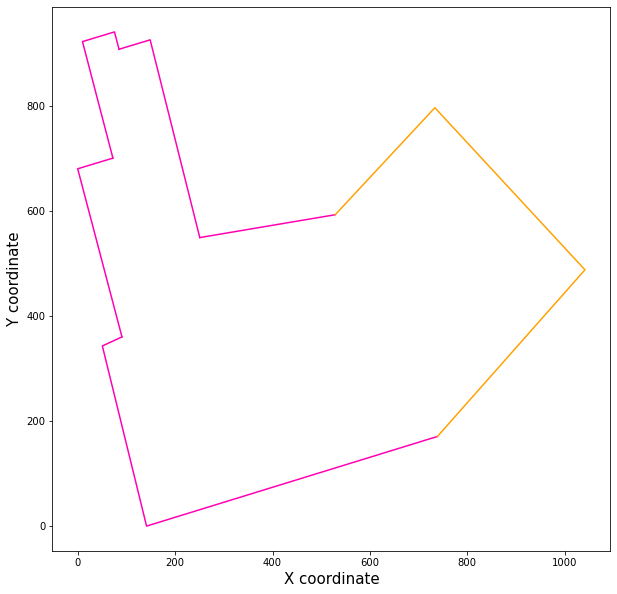

In [51]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('X coordinate', fontsize=15)
ax.set_ylabel('Y coordinate', fontsize=15)
for d in d_[0]:
    ax.plot(*d.xy, label='LineString', color='#ff00b4')
for d in d_[1]:
    ax.plot(*d.xy, label='LineString', color='#ffa200')
for d in d_[2]:
    ax.plot(*d.xy, label='LineString', color='#ff0000')
for d in d_[3]:
    ax.plot(*d.xy, label='LineString', color='#00ff54')
for d in d_[4]:
    ax.plot(*d.xy, label='LineString', color='#0012ff')
for d in d_[5]:
    ax.plot(*d.xy, label='LineString', color='#ffcc00')
for d in d_[6]:
    ax.plot(*d.xy, label='LineString', color='#9c00ff')

plt.show()